In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
import tqdm
import pandas as pd
from scipy.interpolate import interp1d
from scipy import signal
import scipy
from scipy.signal import butter, savgol_filter
from IPython.display import Audio
from scipy.signal import chirp



In [ ]:
def read_scalar_file(file_path):
      with open(file_path, 'r') as file:
            # Read lines from the file
          lines = file.readlines()

            # Convert each line to a float and store in a list (vector)
          scalar_vector = [float(line.strip()) for line in lines]

      return scalar_vector

In [ ]:
filename1 = '/content/drive/MyDrive/Borradores_resubmit_sueños/Spectra_song/spectrum_sintetico_dia_3.txt'
result1 = read_scalar_file(filename1)
result1=np.array(result1)

In [ ]:
filename2 = '/content/drive/MyDrive/Borradores_resubmit_sueños/Spectra_dream/spectrum_sintetico_sueno_3.txt'
result2 = read_scalar_file(filename2)
result2=np.array(result2)

In [ ]:
np.corrcoef(result1[0:9000], result2[0:9000])[0][1]

0.19798660387957231

In [ ]:
import os, sys
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
# sns.set_theme()
sns.reset_orig()
from PIL import Image
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir_song = '/content/drive/MyDrive/Borradores_resubmit_sueños/Spectra_song'
base_dir_dream = '/content/drive/MyDrive/Borradores_resubmit_sueños/Spectra_dream'

In [ ]:
file_list_song = os.listdir(base_dir_song)
file_list_song.sort()
print(len(file_list_song), "Files dentro de Cantos")

95 Files dentro de Cantos


In [ ]:
file_list_dream = os.listdir(base_dir_dream)
file_list_dream.sort()
print(len(file_list_dream), "Files dentro de sueños")

103 Files dentro de sueños


In [ ]:
corre_s_s=[]
cont_s=0
matrix_c_s_s=[]
vector_c_s_s=np.zeros(3)

In [ ]:
for indice_1 in range(len(file_list_song)):
    for indice_2 in range(len(file_list_song)):
        if indice_2>indice_1:
            filename1 = os.path.join(base_dir_song, file_list_song[indice_1])
            filename2 = os.path.join(base_dir_song, file_list_song[indice_2])
            result1 = read_scalar_file(filename1)
            result2 = read_scalar_file(filename2)
            corre_s_s.append(np.corrcoef(result1[0:9000], result2[0:9000])[0][1])
            matrix_c_s_s.append(cont_s)
            matrix_c_s_s[cont_s]=(cont_s, indice_1,indice_2,np.corrcoef(result1[0:9000], result2[0:9000])[0][1])
            cont_s+=1
            print(cont_s, indice_1,indice_2,np.corrcoef(result1[0:9000], result2[0:9000])[0][1])




In [ ]:
matrix_c_s_s=np.array(matrix_c_s_s)


In [ ]:
np.savetxt('/content/drive/MyDrive/Borradores_resubmit_sueños/correlaciones_s_s.txt', corre_s_s)
np.save('/content/drive/MyDrive/Borradores_resubmit_sueños/matrix_correlaciones_s_s.npy',matrix_c_s_s)

In [ ]:
print(sum(corre_s_s)/len(corre_s_s))


0.40194615476823436


In [ ]:
corre_d_d=[]
cont_d=0
matrix_c_d_d=[]
vector_c_d_d=np.zeros(3)

In [ ]:
for indice_1 in range(len(file_list_dream)):
    for indice_2 in range(len(file_list_dream)):
        if indice_2>indice_1:
            filename1 = os.path.join(base_dir_dream, file_list_dream[indice_1])
            filename2 = os.path.join(base_dir_dream, file_list_dream[indice_2])
            result1 = read_scalar_file(filename1)
            result2 = read_scalar_file(filename2)
            corre_d_d.append(np.corrcoef(result1[0:9000], result2[0:9000])[0][1])
            matrix_c_d_d.append(cont_d)
            matrix_c_d_d[cont_d]=(cont_d, indice_1,indice_2,np.corrcoef(result1[0:9000], result2[0:9000])[0][1])
            cont_d+=1
            print(cont_d, indice_1,indice_2,np.corrcoef(result1[0:9000], result2[0:9000])[0][1])




In [ ]:
print(sum(corre_d_d)/len(corre_d_d))

0.39066939150988317


In [ ]:
matrix_c_d_d=np.array(matrix_c_d_d)

In [ ]:
np.savetxt('/content/drive/MyDrive/Borradores_resubmit_sueños/correlaciones_d_d.txt', corre_d_d)
np.save('/content/drive/MyDrive/Borradores_resubmit_sueños/matrix_correlaciones_d_d.npy',matrix_c_d_d)

In [ ]:
corre_s_d=[]
cont_sd=0
matrix_c_s_d=[]
vector_c_s_d=np.zeros(3)

In [ ]:
for indice_1 in range(len(file_list_song)):
    for indice_2 in range(len(file_list_dream)):
        if indice_2>indice_1:
            filename1 = os.path.join(base_dir_song, file_list_song[indice_1])
            filename2 = os.path.join(base_dir_dream, file_list_dream[indice_2])
            result1 = read_scalar_file(filename1)
            result2 = read_scalar_file(filename2)
            corre_s_d.append(np.corrcoef(result1[0:9000], result2[0:9000])[0][1])
            matrix_c_s_d.append(cont_sd)
            matrix_c_s_d[cont_sd]=(cont_sd, indice_1,indice_2,np.corrcoef(result1[0:9000], result2[0:9000])[0][1])
            cont_sd+=1
            print(cont_sd, indice_1,indice_2,np.corrcoef(result1[0:9000], result2[0:9000])[0][1])

In [ ]:
matrix_c_s_d=np.array(matrix_c_s_d)

In [ ]:
np.savetxt('/content/drive/MyDrive/Borradores_resubmit_sueños/correlaciones_s_d.txt', corre_s_d)
np.save('/content/drive/MyDrive/Borradores_resubmit_sueños/matrix_correlaciones_s_d.npy',matrix_c_s_d)

In [ ]:
print(sum(corre_s_d)/len(corre_s_d))

0.37126801641429313


(0.0, 1000.0)

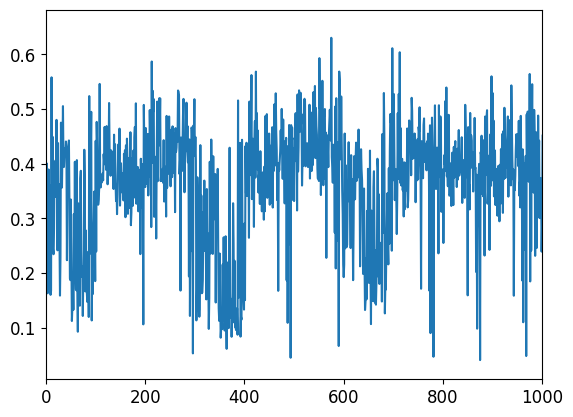

In [ ]:
plt.plot(corre_s_d)
plt.xlim(0,1000)
#matrix_c_s_s[1060]
#plt.xlim(1000,1100)
#matrix_c_s_d[1060]

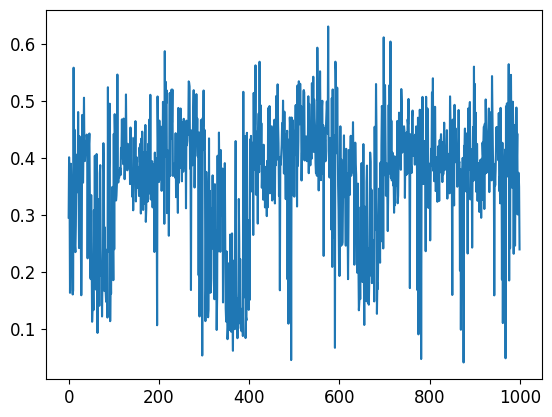

In [ ]:
plt.plot(matrix_c_s_d[0:1000,3])

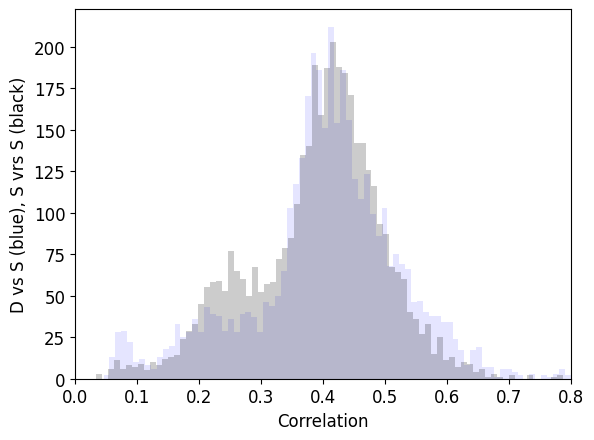

In [ ]:
f=plt.figure()
plt.rcParams['font.size'] = 12
plt.hist(matrix_c_s_s[0:4000,3],bins=100,alpha=0.1,color='b')
#plt.hist(corre_d_d,bins=100,alpha=0.1,color='g')
plt.hist(matrix_c_d_d[0:4000,3],bins=100,alpha=0.2,color='k')
#plt.hist(corre_s_s,bins=100,alpha=0.2,color='k')
plt.xlabel('Correlation')
plt.ylabel('D vs S (blue), S vrs S (black)')
plt.xlim(0,0.8)
#plt.show()
f.savefig('/content/drive/MyDrive/Borradores_resubmit_sueños/Trinos/Dreamed_correlation.pdf')
#plt.show()


Recuperar el histograma leyendo de los vectores

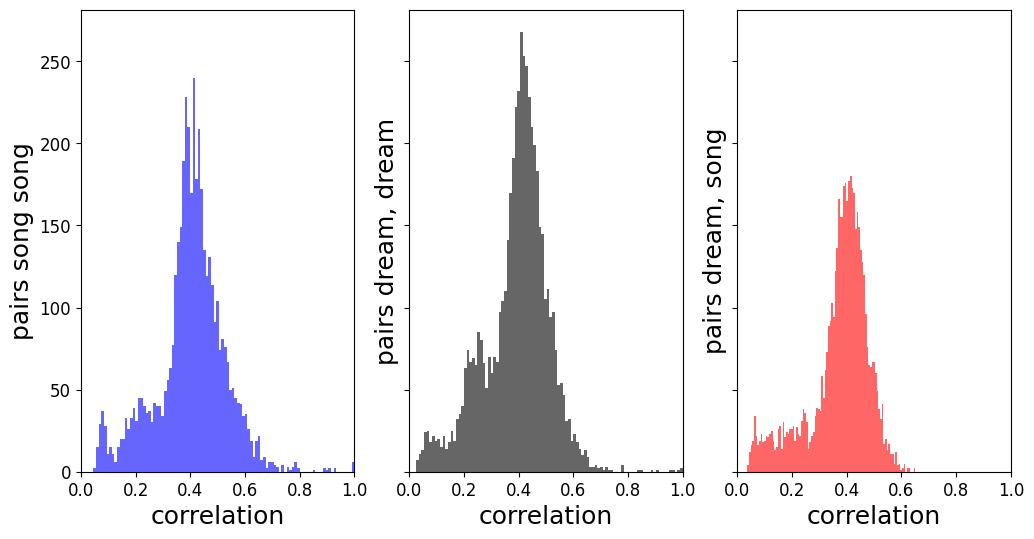

In [ ]:
import matplotlib.font_manager as font_manager
#axis_font = {'fontname':'times', 'size':'18'}
axis_font = {'size':'18'}
fig, ax = plt.subplots(1, 3, sharey='row', figsize=(12, 6))
#fig, ax = plt.subplots(1, 2, sharey='row', figsize=(12, 6))
#ax[0].hist(matrix_c_s_s[0:4000,3],bins=100,alpha=0.6,color='b')
ax[0].hist(matrix_c_s_s[:,3],bins=100,alpha=0.6,color='b')
#ax[1].hist(matrix_c_d_d[0:4000,3],bins=100,alpha=0.6,color='k')
ax[1].hist(matrix_c_d_d[:,3],bins=100,alpha=0.6,color='k')
#ax[2].hist(matrix_c_s_d[0:4000,3],bins=100,alpha=0.6,color='r')
ax[2].hist(matrix_c_s_d[:,3],bins=100,alpha=0.6,color='r')
ax[0].set_xlabel('correlation',**axis_font)
ax[0].set_xlim([0,1])
ax[0].set_ylabel('pairs song song',**axis_font)
ax[1].set_xlabel('correlation',**axis_font)
ax[1].set_xlim([0,1])
ax[1].set_ylabel('pairs dream, dream',**axis_font)
ax[2].set_xlabel('correlation',**axis_font)
ax[2].set_xlim([0,1])
ax[2].set_ylabel('pairs dream, song',**axis_font)
fig.savefig('/content/drive/MyDrive/Borradores_resubmit_sueños/Trinos/Dreamed_correlation_all_combinations.pdf')


In [ ]:
matrix_c_s_d[10]


array([10.        ,  0.        , 11.        ,  0.16757407])

In [ ]:
data_song=np.load('/content/drive/MyDrive/Borradores_resubmit_sueños/matrix_correlaciones_s_s.npy')
data_dream=np.load('/content/drive/MyDrive/Borradores_resubmit_sueños/matrix_correlaciones_d_d.npy')
data_s_d=np.load('/content/drive/MyDrive/Borradores_resubmit_sueños/matrix_correlaciones_s_d.npy')


In [ ]:
#print(np.mean(data_song[0:4000,3]))
#print(np.mean(data_dream[0:4000,3]))
#print(np.mean(data_s_d[0:4000,3]))
print(np.mean(data_song[:,3]))
print(np.mean(data_dream[:,3]))
print(np.mean(data_s_d[:,3]))

0.4019461547682336
0.3906693915098823
0.371268016414292


In [ ]:
#print(np.std(data_song[0:4000,3]))
#print(np.std(data_dream[0:4000,3]))
#print(np.std(data_s_d[0:4000,3]))
print(np.std(data_song[:,3]))
print(np.std(data_dream[:,3]))
print(np.std(data_s_d[:,3]))


0.12539341183189331
0.11971303456575808
0.11103888968145247


In [ ]:
#sig_s=np.std(data_song[0:4000,3])/np.sqrt(len(data_song[0:4000,3]))
#sig_d=np.std(data_dream[0:4000,3])/np.sqrt(len(data_dream[0:4000,3]))
#sig_s_d=np.std(data_s_d[0:4000,3])/np.sqrt(len(data_s_d[0:4000,3]))
sig_s=np.std(data_song[:,3])/np.sqrt(len(data_song[:,3]))
sig_d=np.std(data_dream[:,3])/np.sqrt(len(data_dream[:,3]))
sig_s_d=np.std(data_s_d[:,3])/np.sqrt(len(data_s_d[:,3]))
print(sig_s)
print(sig_d)
print(sig_s_d)

0.0018765666232090383
0.0016517249891364325
0.001536144120885802


In [ ]:
#Z_d_s=(np.mean(data_song[0:4000,3])-np.mean(data_dream[0:4000,3]))/np.sqrt(sig_s**2+sig_d**2)
Z_d_s=(np.mean(data_song[:,3])-np.mean(data_dream[:,3]))/np.sqrt(sig_s**2+sig_d**2)
print(Z_d_s)

4.510814382978772


In [ ]:
Z_d_sd=(np.mean(data_song[:,3])-np.mean(data_s_d[:,3]))/np.sqrt(sig_s**2+sig_s_d**2)
#Z_d_sd=(np.mean(data_song[0:4000,3])-np.mean(data_s_d[0:4000,3]))/np.sqrt(sig_s**2+sig_s_d**2)
print(Z_d_sd)

12.650116109939734
